In [23]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
eng = pd.read_csv('takehome_user_engagement.csv')
users = pd.read_csv('takehome_users.csv', encoding = 'latin-1')

In [25]:
eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [26]:
eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [27]:
eng['time_stamp'].max()

'2014-06-06 14:58:50'

In [28]:
eng['time_stamp'].min()

'2012-05-31 08:20:06'

In [29]:
eng['user_id'].value_counts()

3623     606
906      600
1811     593
7590     590
8068     585
        ... 
4699       1
4698       1
4697       1
4696       1
12000      1
Name: user_id, Length: 8823, dtype: int64

In [30]:
eng['user_id'].nunique()

8823

In [31]:
eng['visited'].value_counts()

1    207917
Name: visited, dtype: int64

In [32]:
eng['visited'].nunique()

1

In [36]:
#Convert time_stamp column to type datetime
eng['date_time'] = pd.to_datetime(engagement_df.time_stamp)

In [37]:
#Extract just the dates and dropping the timestamps
eng['date'] = eng['date_time'].dt.date

In [38]:
eng.head()

,time_stamp,user_id,visited,date_time,date
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,2013-12-25


In [15]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [20]:
users.nunique()

object_id                     12000
creation_time                 11996
name                          11355
email                         11980
creation_source                   5
last_session_creation_time     8821
opted_in_to_mailing_list          2
enabled_for_marketing_drip        2
org_id                          417
invited_by_user_id             2564
dtype: int64

In [ ]:
We notice some duplicates in name and email. Last Creation time has some null values.

In [39]:
#Create a boolean mask dictionary to remove users with less than 7 days logging in
#Key is the user ID
#Value is if the user had 7 or more days logging in
boo_count = pd.Series.to_dict(eng.groupby('user_id').count().date >= 3)
boo_count

{1: False,
 2: True,
 3: False,
 4: False,
 5: False,
 6: False,
 7: False,
 10: True,
 11: False,
 13: False,
 14: False,
 17: False,
 19: False,
 20: True,
 21: False,
 22: False,
 23: False,
 24: False,
 25: False,
 27: False,
 28: False,
 29: False,
 30: False,
 31: False,
 33: True,
 36: False,
 37: False,
 41: False,
 42: True,
 43: True,
 44: False,
 45: False,
 46: False,
 47: False,
 48: False,
 49: False,
 50: True,
 51: False,
 53: True,
 54: False,
 55: False,
 56: False,
 57: False,
 58: False,
 59: True,
 60: True,
 61: False,
 63: True,
 64: False,
 65: False,
 66: False,
 67: False,
 68: False,
 69: True,
 72: False,
 73: False,
 74: True,
 75: False,
 76: False,
 77: True,
 78: False,
 80: True,
 81: True,
 82: True,
 83: False,
 84: False,
 85: False,
 86: False,
 87: True,
 88: False,
 89: False,
 90: False,
 91: False,
 92: False,
 94: False,
 95: True,
 96: False,
 97: False,
 98: False,
 99: False,
 100: False,
 101: False,
 103: False,
 105: False,
 106: False,
 

In [41]:
eng_df = eng.copy()
eng['user_3'] = eng.user_id.map(boo_count)
eng.head(15)

,time_stamp,user_id,visited,date_time,date,user_3
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,2014-04-22,False
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,2013-11-15,True
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,2013-11-29,True
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,2013-12-09,True
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,2013-12-25,True
5,2013-12-31 03:45:04,2,1,2013-12-31 03:45:04,2013-12-31,True
6,2014-01-08 03:45:04,2,1,2014-01-08 03:45:04,2014-01-08,True
7,2014-02-03 03:45:04,2,1,2014-02-03 03:45:04,2014-02-03,True
8,2014-02-08 03:45:04,2,1,2014-02-08 03:45:04,2014-02-08,True
9,2014-02-09 03:45:04,2,1,2014-02-09 03:45:04,2014-02-09,True


In [42]:
eng.groupby('user_id')['user_3'].count()

user_id
1         1
2        14
3         1
4         1
5         1
         ..
11996     1
11997     1
11998     1
11999     1
12000     1
Name: user_3, Length: 8823, dtype: int64

In [43]:
eng_sub=eng[eng['user_3'] == True]

In [44]:
eng_sub.head()

,time_stamp,user_id,visited,date_time,date,user_3
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,2013-11-15,True
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,2013-11-29,True
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,2013-12-09,True
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,2013-12-25,True
5,2013-12-31 03:45:04,2,1,2013-12-31 03:45:04,2013-12-31,True


In [46]:
eng_sub['user_id'].nunique()

2248

In [ ]:
Now that is the count of the no. of users with atleast 3 login days

We are still away from defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday period. Now we need to check which of these users first and third login was within a seven day period. If the first three logins are within the period, then they are an adopted user. If not then we have to check login 2, 3, 4 of the same user. The process continues till we find three logins in a same week.



In [48]:
# Create a list of all the user ID's
user_ids = [x for x,y in eng_sub.groupby('user_id')]


In [49]:
eng_sub1 = eng_sub.groupby('user_id')['date_time']

In [50]:
def login_3_check(i):
    '''This function takes in a list of login time stamps and returns whether or not there are at least 3 logins
    in a one week time span
    
    Inputs
    x --> a list of dates
    
    Outputs
    Boolean True or False'''
    
    time_frame = len(i)
    j = 0
    # loop through each date in the list starting with the first date and ending at 2nd to the last date in the list
    while j < (time_frame - 2):
        #Check if the timestamp that is 2 timestamps away from the current is greater than 7 days
        if (i[j + 2] - i[j]).days > 7:
            #Increment idx to make the next timestamp in the list the referenced timestamp
            j += 1
            continue
            
        else:
            #return true that the critera is satisfied
            return True  
    #after looping through all timestamps return false since the critera isn't satisfied
    return False

In [51]:
def adopted_user_criteria(eng_sub1, users):
    '''This function has two inputs; a groupby dataframe and a list of users and returns a dictionary with 
    user_ids as keys and a boolean (True or False) as the value indicating if that user satisfies the 
    "adopted user" critera
    
    Inputs
    eng_sub1 --> dataframe groupedby user_ids and column of date_time
    
    Outputs
    success --> Dictionary with user_ids as the keys and boolean True or False as the value
    '''
    # Create an empty dictionary- success to update
    success = {}
    
    # Create a list of lists of all the dates for each user
    dates = [list(eng_sub1.get_group(x)) for x in users]
    #Iterate through each list of dates for the corresponding user and check criteria
    for pos,user in enumerate(users):
        #update dictionary
        success[user] = login_3_check(dates[pos])
    return success

In [52]:
success = adopted_user_criteria(eng_sub1,user_ids)

In [53]:
success

{2: True,
 10: True,
 20: True,
 33: True,
 42: True,
 43: True,
 50: True,
 53: True,
 59: False,
 60: True,
 63: True,
 69: True,
 74: True,
 77: False,
 80: True,
 81: True,
 82: True,
 87: True,
 95: False,
 126: False,
 133: True,
 135: True,
 136: False,
 141: True,
 142: False,
 146: True,
 153: True,
 160: True,
 165: True,
 168: True,
 171: False,
 172: True,
 174: True,
 185: True,
 188: True,
 197: True,
 200: True,
 202: True,
 203: True,
 209: True,
 214: True,
 221: False,
 230: True,
 241: False,
 245: True,
 247: True,
 251: False,
 263: True,
 265: True,
 275: True,
 277: False,
 280: True,
 283: True,
 297: True,
 298: True,
 305: True,
 310: True,
 311: True,
 321: True,
 322: True,
 330: False,
 337: False,
 341: True,
 345: True,
 347: True,
 351: True,
 362: True,
 363: True,
 367: False,
 370: True,
 375: False,
 382: False,
 383: True,
 390: False,
 397: True,
 398: False,
 401: True,
 417: False,
 418: True,
 430: True,
 445: True,
 450: True,
 455: False,
 460

In [54]:
# We create a new mapping.
eng_sub['user_3_new'] = eng_sub.user_id.map(success)

C:\Users\Shweta\AppData\Local\Temp\ipykernel_15308\3299809620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_sub['user_3_new'] = eng_sub.user_id.map(success)


In [55]:
#And a new subset 
sub_of_eng_sub = eng_sub[eng_sub['user_3_new'] == True]

In [56]:
sub_of_eng_sub['user_id'].nunique()

1656

In [ ]:
Now this is the number of users with 3 logins on separate days in a 7 day period.

In [ ]:
We now check for the adopted users and add these to the dataframe 'users'

In [58]:
# Create a list of all adopted user id's
adopted_users = sub_of_eng_sub['user_id'].unique()

In [60]:
def check_user(x, users):
    if x in users:
        return 1
    else:
        return 0

In [62]:
# Mark those users who were adopted in the overall dataframes
users['adopted_user'] = users['object_id'].apply(lambda x: check_user(x, adopted_users))

In [63]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [64]:
# now we add it to the first initial dataset as well
eng['adopted_user'] = eng['user_id'].apply(lambda x: check_user(x, adopted_users))

In [65]:
eng.head()

,time_stamp,user_id,visited,date_time,date,user_3,adopted_user
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,2014-04-22,False,0
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,2013-11-15,True,1
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,2013-11-29,True,1
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,2013-12-09,True,1
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,2013-12-25,True,1


Now that we have added the new variable Adopted user in both datasets, we can analyse the key factors that predict future adoption. 

Before that we clean our datasets further.

In [68]:
eng=eng[['user_id','date','adopted_user']]

In [69]:
eng.head()

,user_id,date,adopted_user
0,1,2014-04-22,0
1,2,2013-11-15,1
2,2,2013-11-29,1
3,2,2013-12-09,1
4,2,2013-12-25,1


In [71]:
users.adopted_user.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    86.2%
1    13.8%
Name: adopted_user, dtype: object

In [ ]:
Only 13% of users are adopted users. 

<AxesSubplot:xlabel='creation_source'>

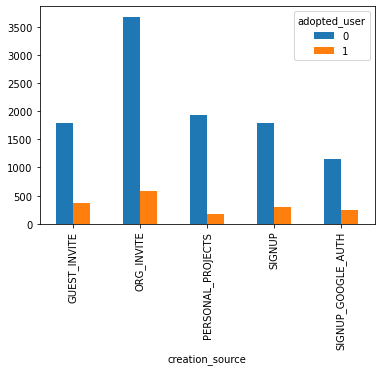

In [72]:
# Lets analyse creation source vs adoption
users.pivot_table(index='creation_source', columns='adopted_user', aggfunc='size').plot(kind='bar')


We see higher number of adopted users with Org_invite, but it still may not be a predictor. Let us check for correlation with Chi Square.


In [82]:
# Cross tabulation between creation source and adopted_user: Assumption(H0): The two columns are NOT related to each other
CrosstabResult=pd.crosstab(index=users['creation_source'],columns=users['adopted_user'])
print(CrosstabResult1)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

adopted_user                 0     1
opted_in_to_mailing_list            
0                         7779  1227
1                         2565   429
The P-Value of the ChiSq Test is: 7.884346873316259e-19


In [74]:
# Cross tabulation between mailing list and adopted_user: Assumption(H0): The two columns are NOT related to each other
CrosstabResult1=pd.crosstab(index=users['opted_in_to_mailing_list'],columns=users['adopted_user'])
print(CrosstabResult1)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult1)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

adopted_user                 0     1
opted_in_to_mailing_list            
0                         7779  1227
1                         2565   429
The P-Value of the ChiSq Test is: 0.34847945597884034


In the above example, the P-value came higher than 0.05. Hence H0 will be accepted. Which means the variables are not correlated with each other.

In [75]:
# Cross tabulation between enabled for marketing drip and adopted_user: Assumption(H0): The two columns are NOT related to each other
CrosstabResult2=pd.crosstab(index=users['enabled_for_marketing_drip'],columns=users['adopted_user'])
print(CrosstabResult1)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult2)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

adopted_user                 0     1
opted_in_to_mailing_list            
0                         7779  1227
1                         2565   429
The P-Value of the ChiSq Test is: 0.49429472330968593


In the above example, the P-value came higher than 0.05. Hence H0 will be accepted. Which means the variables are not correlated with each other.

We dont see much correlation here. Lets check the eng dataset again.

In [83]:
eng.head()

,user_id,date,adopted_user
0,1,2014-04-22,0
1,2,2013-11-15,1
2,2,2013-11-29,1
3,2,2013-12-09,1
4,2,2013-12-25,1


In [85]:
set1=eng[eng['adopted_user'] == True]
set1.head()

,user_id,date,adopted_user
1,2,2013-11-15,1
2,2,2013-11-29,1
3,2,2013-12-09,1
4,2,2013-12-25,1
5,2,2013-12-31,1


In [ ]:
Now we have the logins of only the adopted users.

Text(0.5, 0, '# Of Logins for Each Adopted User')

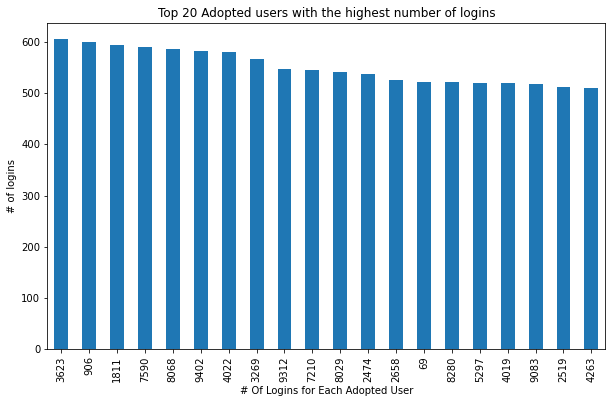

In [99]:
set1['user_id'].value_counts(ascending=False).head(20). plot(kind='bar',figsize = (10,6))
plt.title('Top 20 Adopted users with the highest number of logins')
plt.ylabel('# of logins')
plt.xlabel('# Of Logins for Each Adopted User')

In [ ]:
These are the top 20 adopted users with the highest logins.They have login of more than 500 times.

In [91]:
set1['user_id'].nunique() # these are the unique values of adopted users

1656

In [106]:
# Lets  check the min and max value of the average of logins achieved by a adopted user
min_adopted=set1.groupby('user_id')['date'].count().min()

In [107]:
max_adopted=set1.groupby('user_id')['date'].count().max()


In [108]:
avg_adopted= set1.groupby('user_id')['date'].count().mean()

In [109]:
print("For adopted users: ")
print("Minimum number of logins:", min_adopted)
print("Maximum number of logins:", max_adopted)
print("Average number of logins:", avg_adopted)

For adopted users: 
Minimum number of logins: 3
Maximum number of logins: 606
Average number of logins: 119.7626811594203


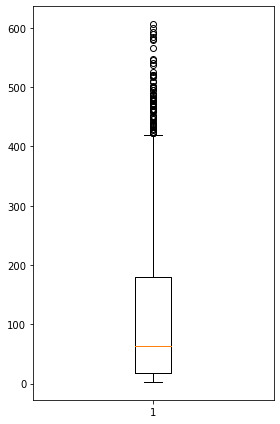

In [127]:
x= set1.groupby('user_id')['date'].count()
figure = plt.figure(figsize =(4, 6))
plt.boxplot(x)  
plt.show()


A box plot reveals that the median is far lower than the average and we have quite a few outliers.

In [101]:
#Lets do the same for unadopted users.
set2=eng[eng['adopted_user'] == False]

Text(0.5, 0, '# Of Logins for Each Adopted User')

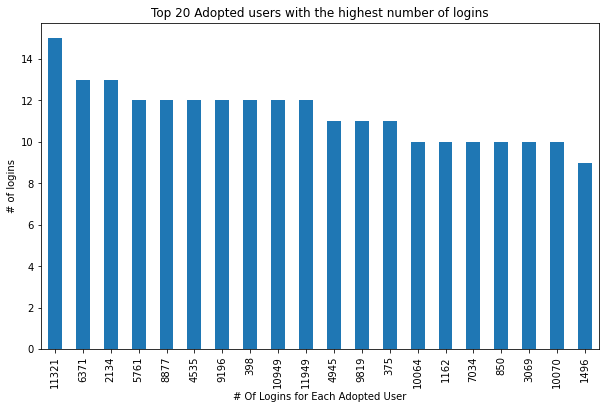

In [102]:
set2['user_id'].value_counts(ascending=False).head(20). plot(kind='bar',figsize = (10,6))
plt.title('Top 20 Adopted users with the highest number of logins')
plt.ylabel('Number of logins')
plt.xlabel('Number Of Logins for Each Adopted User')

In [ ]:
The highest number of login of an unadopted user is just 14. 

In [105]:
# Lets  check the min and max value of the average of logins achieved by a adopted user
Min_unadopted=set2.groupby('user_id')['date'].count().min()
Max_unadopted= set2.groupby('user_id')['date'].count().max()
Avg_unadopted = set2.groupby('user_id')['date'].count().mean()
print("For unadopted users the ")
print("Minimum number of logins:", Min_unadopted)
print("Maximum number of logins:", Max_unadopted)
print("Average number of logins:", Avg_unadopted)

For unadopted users the 
Minimum number of logins: 1
Maximum number of logins: 15
Average number of logins: 1.3380772987302916


While the minimum number of logins for unadopted and adopted is not a huge difference, we notice the maximum and the avg logins for these two sets of users has a huge difference.

In [111]:
(119.76-1.33)/1.33

89.04511278195488

In [ ]:
The adopted user logins in on an average 89 times more than the unadopted user.

In [112]:
(606-15)/15

39.4

The highest usage by an adopted user is 39 times more than the highest usage by an unadopted user.

While this activity of login itself could be an indicator of adoption and a predictor of adopted user. We also notice that the max and average are affected by the outliers as the box plot indicates that the median is below 100.So the login in adopted users users have a high variance. Yet, we clearly see a difference in the number of logins, which can be used as predictor. 